# TRATAMIENTO DIGITAL DE LA SEÑAL
## Curso 2024-25

**Instrucciones:**

- Asegurate de poner tu código en los lugares que indique: `YOUR CODE HERE`. 
- Recuerda que debes eliminar la linea:  `raise NotImplementedError()`.
- La lineas con variables asignadas a `None`, las puedes borrar. Pero deberias asignar el valor de la variable a lo que se te pida en cada caso.



---

# Diseño de filtros IIR 

En este ejercicio aprenderemos a obtener los coeficientes de filtros IIR empleando la libreria `scipy.signal`

Un filtro IIR se puede implementar como una relación lineal recurrente entre la entrada del filtro $x[n]$ y las entradas anteriores del filtro $x[n-k]$ y las salidas anteriores del filtro anteriores $y[n-l]$ de la siguiente forma:

$$a_0 y[n] = \sum_{k=0}^K b_k x[n-k] - \sum_{l=1}^L a_l y[n-l]$$

En la siguiente figura podemos ver gráficamente la ecuación anterior y las muestras empleadas para el cálculo de $y[n]$:

![iir_samples](figs/iir_samples.png)


La función de transferencia del filtro empleando la ecuación anterior tiene la siguiente forma:

$$ H(z) = \frac{b_0 + b_1 z^{-1} + \ldots + b_K z^{-K}}{a_0 + a_1 z^{-1}+ \ldots + a_L z^{-L}} $$

(La respuesta en frecuencia se obtiene cambiando $z= e^{j\omega}$)

Por tanto, la función de transferencia del filtro viene caracterizada completamente por los coeficientes $b_k$ y $a_l$  y por tanto el proceso de diseño del filtro consistirá en determinar: 
1. Los coeficientes del numerador de $H(z)$:`B = [b0, b1, ... , bK]`
2. Los coeficientes del denominador de $H(z)$: `A = [a0, a1,...aL]`

 Como curiosidad, comentar que el coeficiente `a0=1` siempre. Aunque realmente no nos afecta al diseño ya que lo trataremos como un coeficiente más.

Aunque la representación de un filtro mediante los coeficientes `B` y `A` es la mas frecuente existen otras representaciones que son más estables numéricamente y que veremos más adelante.

Para finalizar la introducción comentar que los coeficientes `B` y `A` se pueden ver como los coeficientes de un polinomio de grado $K$ y $L$ respectivamente. Para cuantificar la complejidad del filtro se tiene en cuenta el orden del polinomio del denomidador `A` de forma que se dice que **el orden del filtro es igual al orden del polinomio del denominador**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

# Log UPV
import UPVlog
notebook_filename="ejercicio_07_01"
my_logger=UPVlog.UPVlog(notebook_filename)
import pytest


## Diseño con iirdesign

La libreria `scipy.signal` tiene varias funciones para el diseño de filtros IIR, de entre ellas la funcion [iirdesign](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html) es una de las mas sencillas de usar. Mira la documentación de la función para ver como usarla. Aqui destacamos algunos de los parámetros imporantes:

* El parámetro `ftype` indica la familia del filtro. Las 4 familias de filtros IIR más comunes son:
    * Butterworth
    * Chebyshev tipo I 
    * Chebyshev tipo II
    * Elípiticos
* Los parámetros `wp` y `ws` definen las bandas de paso. Mira la documentación para ver como ajustarlos dependiendo si el filtro es paso bajo, paso alto... Aunque al emplear la letra wp parece referirse a pulsación angular, realmente son frecuencias.
* A veces queremos diseñar el filtro con frecuencias normalizadas, en este caso simplemente hay que hacer que $f_s=1$

  
### Comparación función de transferencia en funcion de la familia del filtro. 

Comenzaremos diseñando varios filtros paso bajo con las mismas especificaciones pero cambiando el tipo de familia:



Diseña un filtro paso bajo que cumpla las siguientes especificaciones:

* Paso bajo
* Frecuencia de muestreo = 2kHz
* Frecuencia máxima de la banda de paso $f_{pass} = 200 Hz$
* Frecuencia mínima de la banda de atenuada $f_{stop}=400 Hz$
* Atenuación máxima en la banda de paso $R_{pass} = 3dB$
* Atenuación mínima en la banda atenuada $R_{stop} = 35 dB$


Para cada una de las 4 familias de filtros mencionadas anteriormente: Butterworth, chebyshev tipo I, chebyshev tipo II, eliptico:


In [2]:
from scipy.signal  import iirdesign

# Frecuencias normalizadas y especificaciones
fs = 2000
wp = 0.2   # banda de paso
ws = 0.4   # banda de atenuación
Rp = 3     # atenuación máxima en banda de paso (dB)
Rs = 35    # atenuación mínima en banda de atenuación (dB)

# Butterworth
B_butt, A_butt = iirdesign(wp, ws, Rp, Rs, ftype='butter')

# Chebyshev tipo I
B_cheby1, A_cheby1 = iirdesign(wp, ws, Rp, Rs, ftype='cheby1')

# Chebyshev tipo II
B_cheby2, A_cheby2 = iirdesign(wp, ws, Rp, Rs, ftype='cheby2')

# Elíptico
B_ellip, A_ellip = iirdesign(wp, ws, Rp, Rs, ftype='ellip')

# Determinamos los ordenes de cada filtro:
N_butt = len(A_butt) -1 # el orden es numero de coeff -1
N_cheby1 = len(A_cheby1) -1
N_cheby2 = len(A_cheby2) -1
N_ellip = len(A_ellip) -1

print(f"El orden del butterworth es: {N_butt}")
print(f"El orden del cheby1 es: {N_cheby1}")
print(f"El orden del cheby2 es: {N_cheby2}")
print(f"El orden del eliptico es: {N_ellip}")

El orden del butterworth es: 6
El orden del cheby1 es: 4
El orden del cheby2 es: 4
El orden del eliptico es: 3


Vemos que el filtro que requiere de mas orden es el Butterworth y el que menos el elíptico.

In [3]:
# Comprobación
assert N_butt==6, "comprueba el orden del filtro"
assert N_cheby1==4, "comprueba el orden del filtro"
assert N_cheby2==4, "comprueba el orden del filtro"
assert N_ellip==3, "comprueba el orden del filtro"

assert B_butt.max()==pytest.approx(0.00682,1e-3), "comprueba el uso de butter"
assert A_butt.max()==pytest.approx(5.6561,1e-3), "comprueba el uso de butter"

assert B_cheby1.max()==pytest.approx(0.006308,1e-3), "comprueba el uso de cheby1"
assert A_cheby1.max()==pytest.approx(4.3402,1e-3), "comprueba el uso de cheby1"

assert B_cheby2.max()==pytest.approx(0.0443,1e-3), "comprueba el uso de cheby2"
assert A_cheby2.max()==pytest.approx(2.1863,1e-3), "comprueba el uso de cheby2"

assert B_ellip.max()==pytest.approx(0.02793,1e-3), "comprueba el uso de ellip"
assert A_ellip.max()==pytest.approx(2.101,1e-3), "comprueba el uso de ellip"


my_logger.success("comparacion IIR", 5.0)

Success: comparacion IIR*points=5.0


Los coeficientes que acabamos de calcular no son muy informativos respecto si hemos cometido algún error. 

Por ello, una vez tenemos los coeficientes **es muy importante representar la respuesta en frecuencia** para que podamos comprobar que todo ha ido bien. 

Vamos a emplear la función [freqz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html) para este fin . Mira el siguiente ejemplo:

(-40.0, 1.0)

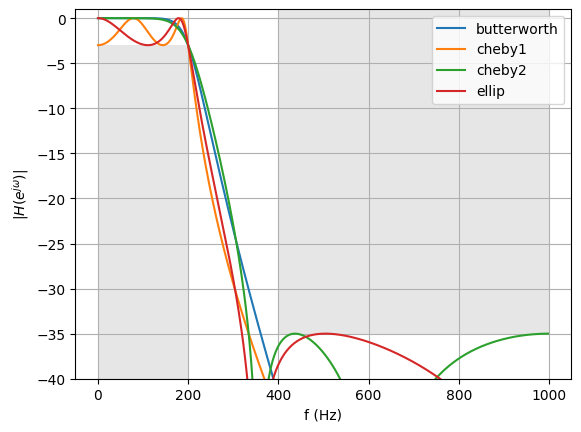

In [4]:
from scipy.signal import freqz

W_butt, H_butt = freqz(B_butt,A_butt, fs = fs)
plt.plot(W_butt,20*np.log10(abs(H_butt)),label='butterworth')

W_cheby1, H_cheby1 = freqz(B_cheby1,A_cheby1, fs = fs)
plt.plot(W_cheby1,20*np.log10(abs(H_cheby1)),label='cheby1')

W_cheby2, H_cheby2 = freqz(B_cheby2,A_cheby2, fs = fs)
plt.plot(W_cheby2,20*np.log10(abs(H_cheby2)),label='cheby2')

W_ellip, H_ellip = freqz(B_ellip,A_ellip, fs = fs)
eps = 1e-10
plt.plot(W_ellip,20*np.log10(abs(H_ellip+eps)),label='ellip')


plt.ylim(-40,1)
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('$|H(e^{j\omega})|$')
plt.legend()
plt.fill([0,200,200,0],[-3,-3,-40,-40], '0.9') # representamos mascara de especificaciones
plt.fill([400,1000,1000,400],[-35,-35,2,2], '0.9')
plt.ylim(-40,1)


En la figura anterior podemos comprobar que todos los filtros cumplen las especificaciones de diseño. Algunos comentarios adicionales son:
* Para unas especificaciones establecidas el filtro eliptico es el que menor orden requiere y el de butterworth el que más.
* A cambio el de butterworth no presenta nada de rizado ni en la banda de paso ni en la rechazada
* Los filtros de Chebyshev requieren el mismo orden, pero en un caso tenemos rizado en la banda de paso (cheby1), mientras que en el otro lo tenemos en la banda atenuada (cheby2).

### Diseño filtro paso alto

Los filtros del apartado anterior eran todos paso bajo, en este apartado diseñaremos un filtro paso alto con las siguientes especificaciones:


* Paso alto
* Chebyshev tipo II
* Frecuencia de muestreo = 2kHz
* Frecuencia máxima de la banda de atenuada $f_{stop} = 200 Hz$
* Frecuencia mínima de la banda de paso $f_{pass}=400 Hz$
* Atenuación máxima en la banda de paso $R_{pass} = 5dB$
* Atenuación mínima en la banda atenuada $R_{stop} = 35 dB$



(-40.0, 1.0)

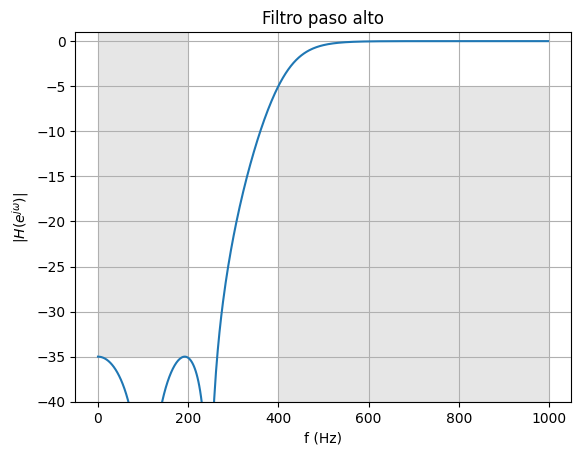

In [5]:
# 1. Parámetros del enunciado
fs = 2000.0             # Frecuencia de muestreo
nyq = fs / 2.0          # Frecuencia de Nyquist (1000 Hz)

f_stop = 200.0
f_pass = 400.0

# 2. Normalización de frecuencias (0 a 1)
# En filtros paso alto: wp > ws
ws = f_stop / nyq       # 200/1000 = 0.2
wp = f_pass / nyq       # 400/1000 = 0.4

# 3. Atenuaciones (dB)
gpass = 5               # Rpass
gstop = 35              # Rstop

# 4. Cálculo de coeficientes
# ftype='cheby2' para Chebyshev tipo II
B_high, A_high = iirdesign(wp, ws, gpass, gstop, ftype='cheby2')
# YOUR CODE HERE
# raise NotImplementedError()

#Representa la respuesta en frecuencia como en el apartado anterior
# deja el resultado  en las siguientes valriables

# Calcular la respuesta en frecuencia
# Eliminamos worN para usar el valor por defecto (512 puntos)
# fs=fs asegura que W_high esté en Hz
W_high, H_high = freqz(B_high, A_high, fs=fs)

# YOUR CODE HERE
# raise NotImplementedError()

plt.plot(W_high,20*np.log10(abs(H_high)),label='paso alto')

plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('$|H(e^{j\omega})|$')
plt.title('Filtro paso alto')
plt.fill([0,200,200,0],[2,2,-35,-35], '0.9')
plt.fill([400,1000,1000,400],[-40,-40,-5,-5], '0.9')
plt.ylim(-40,1)



In [6]:

assert B_high[3]==pytest.approx(-0.719,1e-2), "comprueba los parametros de iirdesign"
assert A_high[3]==pytest.approx(-0.253,1e-2), "comprueba los parametros de iirdesign"
assert W_high[20]== pytest.approx(39.0625,1e-3), "comprueba los parametros de freqz, en particular fs"
my_logger.success("IIR paso alto", 2.5)

Success: IIR paso alto*points=2.5


### Diseño filtro paso banda

Por último diseñaremos un filtro paso banda con estas especificaciones:

* Chebyshev tipo I 
* Frecuencias de banda de paso(fp1, fp2): 300 Hz to 3400 Hz
* Frecuencias de banda atenuada (fs1, fs2): 200 Hz and 4000 Hz
* Rizado de la banda de paso (Rp): 1 dB
* Minima atenuación de la banda eliminada (Rs): 40 dB
* Frecuencia de muestreo (Fs): 16000 kHz


El orden del filtro es 16


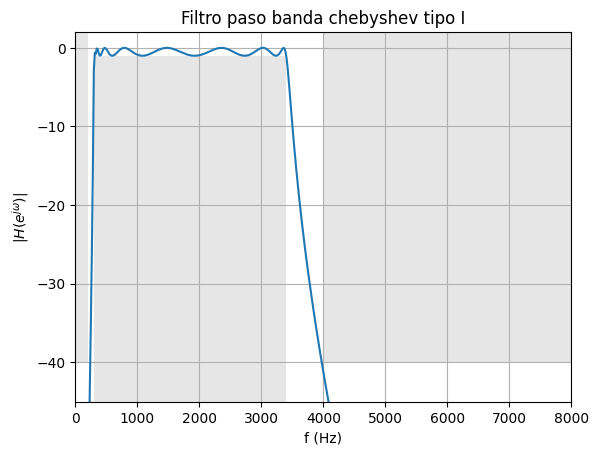

In [9]:
# --- 1. Definición de parámetros ---
Fs = 16000.0            # Frecuencia de muestreo (Corregido a Hz)
nyq = Fs / 2.0          # Frecuencia de Nyquist (8000 Hz)

# Frecuencias de banda de paso y atenuada
fp = [300, 3400]        # Banda de paso
fs_stop = [200, 4000]   # Banda atenuada

# --- 2. Normalización de frecuencias (0 a 1) ---
wp = [f / nyq for f in fp]      # [300/8000, 3400/8000]
ws = [f / nyq for f in fs_stop] # [200/8000, 4000/8000]

# --- 3. Atenuaciones (dB) ---
gpass = 1               # Rizado paso banda (Rp)
gstop = 40              # Atenuación mínima (Rs)

# --- 4. Diseño del filtro ---
# ftype='cheby1' para Chebyshev Tipo I
B_passband, A_passband = iirdesign(wp, ws, gpass, gstop, ftype='cheby1')

# --- 5. Respuesta en frecuencia ---
# Usamos fs=Fs para que el vector W_passband esté en Hz y coincida con la gráfica
W_passband, H_passband = freqz(B_passband, A_passband, fs=Fs)
# YOUR CODE HERE
# raise NotImplementedError()

#Representa la respuesta en frecuencia como en el apartado anterior
# YOUR CODE HERE
#raise NotImplementedError()

plt.plot(W_passband,20*np.log10(abs(H_passband)),label='paso alto')
plt.grid()
plt.xlabel('f (Hz)')
plt.ylabel('$|H(e^{j\omega})|$')
plt.title('Filtro paso banda chebyshev tipo I')
plt.fill([0,200,200,0],[5,5,-40,-40], '0.9')
plt.fill([4000,8000,8000,4000],[5,5,-40,-40], '0.9')

plt.fill([300,3400,3400,300],[-45,-45,-1,-1], '0.9')
plt.ylim(-45,2)
plt.xlim(0,8000)

print(f"El orden del filtro es {len(A_passband)-1}")

In [10]:

assert B_passband[1]==pytest.approx(0.0,1e-2), "comprueba los parametros de iirdesign"
assert A_passband[2]==pytest.approx(60.381,1e-2), "comprueba los parametros de iirdesign"
assert W_passband[20]== pytest.approx(312.5,1e-3), "comprueba los parametros de freqz, en particular fs"

my_logger.success("IIR paso banda", 2.5)

Success: IIR paso banda*points=2.5


Podemos ver que en este caso el orden del filtro ha aumentado considerablemente respecto a los filtro paso bajo o paso alto (aproximadamente el doble). 

Más adelante veremos como estos filtros con especificaciones más exigentes pueden tener problemas de precisión numérica.